# Implementation in Python of toxicity scoring function in Cello 2.0

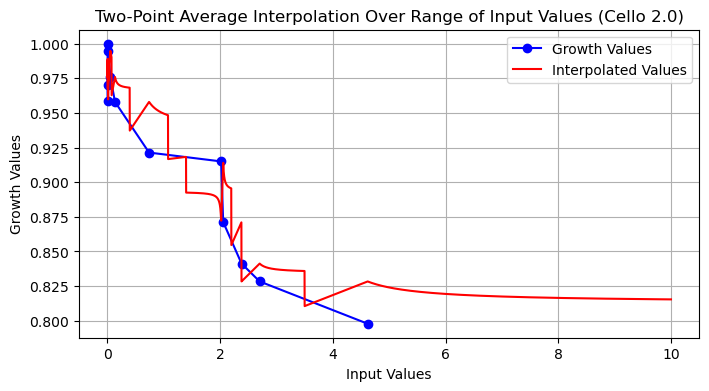

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

def two_point_average_interpolation(x, input_values, growth_values):
    argMinA = -1
    minA = float('inf')
    argMinB = -1
    minB  = float('inf')

    for row, record in enumerate(input_values):
        distance = euclidean([x], [record])
        if distance < minA:
            argMinB = argMinA;
            minB = minA;
            argMinA = row;
            minA = distance;
        elif distance < minB:
            argMinB = row;
            minB = distance;

    valueA = growth_values[argMinA]
    valueB = growth_values[argMinB]
    rtn = (valueA * minA + valueB * minB) / (minA + minB);
    
    return rtn

# Q1_QacR_toxicity
input_values = [
                0.00422,
                0.00497,
                0.009,
                0.0142,
                0.05441,
                0.13559,
                0.74062,
                2.0196,
                2.05552,
                2.38089,
                2.70194,
                4.61805
            ]

growth_values = [
                1.0,
                0.970017637,
                0.958449802,
                0.995058401,
                0.976074008,
                0.957996406,
                0.921387807,
                0.914994509,
                0.871202289,
                0.841232405,
                0.828316861,
                0.797777112
            ]

input_range = np.linspace(0, 10, 5000)
interpolated_values = [two_point_average_interpolation(x, input_values, growth_values) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Two-Point Average Interpolation Over Range of Input Values (Cello 2.0)')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()

# Proposed update to the rtn function

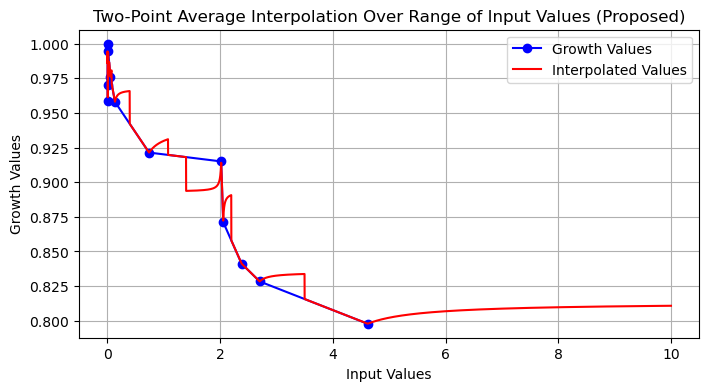

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

def two_point_average_interpolation_v2(x, input_values, growth_values):
    argMinA = -1
    minA = float('inf')
    argMinB = -1
    minB  = float('inf')

    for row, record in enumerate(input_values):
        distance = euclidean([x], [record])
        if distance < minA:
            argMinB = argMinA;
            minB = minA;
            argMinA = row;
            minA = distance;
        elif distance < minB:
            argMinB = row;
            minB = distance;

    valueA = growth_values[argMinA]
    valueB = growth_values[argMinB]
    
    rtn = (valueA * 1/minA + valueB * 1/minB) / (1/minA + 1/minB);
    #This is equivalent to:
    #rtn = (valueA * minB + valueB * minA) / (minA + minB);  
    
    return rtn

# Q1_QacR_toxicity
input_values = [
                0.00422,
                0.00497,
                0.009,
                0.0142,
                0.05441,
                0.13559,
                0.74062,
                2.0196,
                2.05552,
                2.38089,
                2.70194,
                4.61805
            ]

growth_values = [
                1.0,
                0.970017637,
                0.958449802,
                0.995058401,
                0.976074008,
                0.957996406,
                0.921387807,
                0.914994509,
                0.871202289,
                0.841232405,
                0.828316861,
                0.797777112
            ]


input_range = np.linspace(0, 10, 5000)
interpolated_values = [two_point_average_interpolation_v2(x, input_values, growth_values) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Two-Point Average Interpolation Over Range of Input Values (Proposed)')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()

# Proposed update to rtn and minA/minB calculation

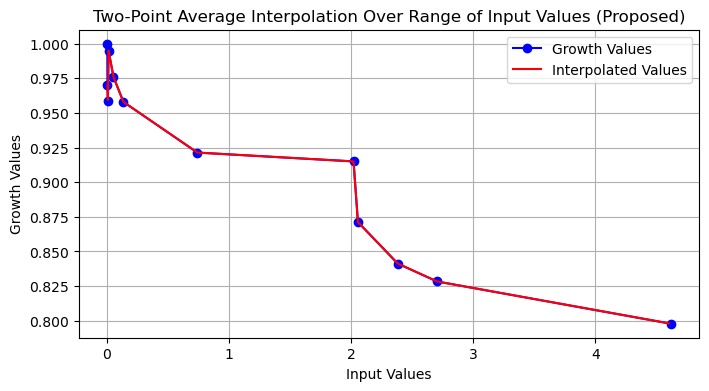

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

def two_point_average_interpolation(x, input_values, growth_values):

    # Correction to define the minA, minB, argMinA, argMinB
    for i in range(len(input_values)-1):
        
        if x >= input_values[i] and x < input_values[i+1]:
            argMinA, argMinB = i, i+1
            minA, minB = x-input_values[i], input_values[i+1]-x
            
    
    valueA = growth_values[argMinA]
    valueB = growth_values[argMinB]
    
    rtn = (valueA * 1/minA + valueB * 1/minB) / (1/minA + 1/minB);
    #This is equivalent to:
    #rtn = (valueA * minB + valueB * minA) / (minA + minB);    

    return rtn

# Q1_QacR_toxicity
input_values = [
                0.00422,
                0.00497,
                0.009,
                0.0142,
                0.05441,
                0.13559,
                0.74062,
                2.0196,
                2.05552,
                2.38089,
                2.70194,
                4.61805
            ]

growth_values = [
                1.0,
                0.970017637,
                0.958449802,
                0.995058401,
                0.976074008,
                0.957996406,
                0.921387807,
                0.914994509,
                0.871202289,
                0.841232405,
                0.828316861,
                0.797777112
            ]

input_range = np.linspace(0.005, 4.6, 5000)
interpolated_values = [two_point_average_interpolation(x, input_values, growth_values) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Two-Point Average Interpolation Over Range of Input Values (Proposed)')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()